In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

In [2]:
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#!pip install mlxtend --upgrade

# Read the dataset as dataframe and preprocessing

In [4]:
#reading data
data=pd.read_csv('/Users/Jerry/Desktop/CSC373/jupyter notebook/Assoc_Analysis_Vidhya.dat.csv',header = None)
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')
data.head()

Shape of data: 315 rows and 8 columns


,0,1,2,3,4,5,6,7
0,1,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,2,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,4,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,5,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


## remove the first column 

In [5]:
data=data.drop(data.columns[0], axis=1)
data.head()

,1,2,3,4,5,6,7
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


# Top 10 frequently buying items by customer

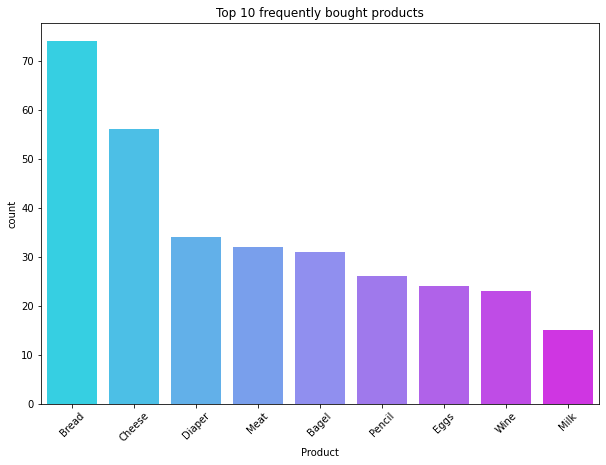

In [7]:
#Top 10 frequently buying items by customer
plt.rcParams['figure.figsize']=10,7
sns.countplot(data=data, x=data.iloc[:, 0],
             order = data.iloc[:, 0].value_counts().head(10).index,
             palette='cool')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.title('Top 10 frequently bought products')
plt.show()

# Unique item from dataset

In [8]:
items = set()
for col in data:
    items.update(data[col].unique())
print(items)

{nan, 'Meat', 'Cheese', 'Bagel', 'Bread', 'Wine', 'Pencil', 'Eggs', 'Diaper', 'Milk'}


# Read dataset as 2d list and perform association analysis

In [9]:
data_file_name = '/Users/Jerry/Desktop/CSC373/jupyter notebook/Assoc_Analysis_Vidhya.dat.csv'

#dataset1 = pd.read_csv(data_file_name)
dataset = []
with open(data_file_name, 'r') as data_file_ptr:
    for in_item in data_file_ptr:
        in_item = in_item.strip()
        in_item_list = in_item.split(",") 
        in_item_list.pop(0)
        dataset.append(in_item_list)

In [11]:
dataset[:5]

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Meat', 'Pencil', 'Wine']]

In [56]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)
### alternatively:
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.01, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.504762,(Bread)
1,0.501587,(Cheese)
2,0.476190,(Meat)
3,0.438095,(Wine)
4,0.438095,(Eggs)
5,0.406349,(Diaper)
6,0.361905,(Pencil)
7,0.501587,(Milk)
8,0.425397,(Bagel)
9,0.238095,"(Bread, Cheese)"


In [66]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
5,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
6,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
7,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
8,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
9,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624


In [79]:
len(rules)

14

## I'm interested in what items people would buy if they bought milk 

In [89]:
for i in range(len(rules)):
    if "Milk" in rules["antecedents"][i]:
        print(set(rules["antecedents"][i]),"->",set(rules["consequents"][i]),"confidence:",rules["confidence"][i])

{'Milk'} -> {'Cheese'} confidence: 0.6075949367088608
{'Meat', 'Milk'} -> {'Cheese'} confidence: 0.8311688311688312
{'Cheese', 'Milk'} -> {'Meat'} confidence: 0.6666666666666666


In [90]:
item = input("which item did people buy?")
print("People buy {} are likely to buy the following items.")
for i in range(len(rules)):
    if item in rules["antecedents"][i]:
        print(set(rules["antecedents"][i]),"->",set(rules["consequents"][i]),"confidence:",rules["confidence"][i])

which item did people buy?Eggs
People buy {} are likely to buy the following items.
{'Eggs'} -> {'Cheese'} confidence: 0.6811594202898551
{'Eggs'} -> {'Meat'} confidence: 0.6086956521739131
{'Eggs', 'Meat'} -> {'Cheese'} confidence: 0.8095238095238095
{'Eggs', 'Cheese'} -> {'Meat'} confidence: 0.723404255319149


In [61]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
5,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
6,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
7,(Meat),"(Cheese, Milk)",0.476190,0.304762,0.203175,0.426667,1.400000,0.058050,1.212625
8,(Cheese),"(Meat, Milk)",0.501587,0.244444,0.203175,0.405063,1.657077,0.080564,1.269976
9,(Milk),"(Meat, Cheese)",0.501587,0.323810,0.203175,0.405063,1.250931,0.040756,1.136575


In [62]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,1
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,1
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,1
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,1
4,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,2
5,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,2
6,"(Cheese, Milk)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429,2
7,(Meat),"(Cheese, Milk)",0.476190,0.304762,0.203175,0.426667,1.400000,0.058050,1.212625,1
8,(Cheese),"(Meat, Milk)",0.501587,0.244444,0.203175,0.405063,1.657077,0.080564,1.269976,1
9,(Milk),"(Meat, Cheese)",0.501587,0.323810,0.203175,0.405063,1.250931,0.040756,1.136575,1


# Try another package for apriori analysis

In [31]:
#!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=ca5d39f2c70c100efc46f721e4add6eb125235819ec5f1bcfb6e15a9c1a24ca9
  Stored in directory: /Users/Jerry/Library/Caches/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [32]:
import apyori
from apyori import apriori

In [49]:
association_rules = apriori(dataset, min_support=0.0045, min_confidence=0.1, min_lift=2, min_length=2)
association_results = list(association_rules)

In [50]:
association_rules

<generator object apriori at 0x7fd8cd9a1a50>

In [51]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule:  -> Cheese
Support: 0.04126984126984127
Confidence: 0.43333333333333335
Lift: 2.237704918032787
Rule:  -> Cheese
Support: 0.06666666666666667
Confidence: 0.7000000000000001
Lift: 2.9400000000000004
Rule:  -> Diaper
Support: 0.050793650793650794
Confidence: 0.5333333333333333
Lift: 2.3013698630136985
Rule:  -> Eggs
Support: 0.050793650793650794
Confidence: 0.5333333333333333
Lift: 2.847457627118644
Rule:  -> Meat
Support: 0.050793650793650794
Confidence: 0.5333333333333333
Lift: 2.5846153846153848
Rule:  -> Milk
Support: 0.06031746031746032
Confidence: 0.6333333333333334
Lift: 2.2670454545454546
Rule:  -> Pencil
Support: 0.04126984126984127
Confidence: 0.43333333333333335
Lift: 2.1666666666666665
Rule:  -> Cheese
Support: 0.05396825396825397
Confidence: 0.5666666666666668
Lift: 2.8333333333333335
Rule:  -> Cheese
Support: 0.06031746031746032
Confidence: 0.6333333333333334
Lift: 2.078125
Rule:  -> Pencil
Support: 0.04126984126984127
Confidence: 0.43333333333333335
Lift: 2.166666666